In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [3]:
data.shape

(16324, 11)

In [4]:
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [5]:
data = data.dropna()

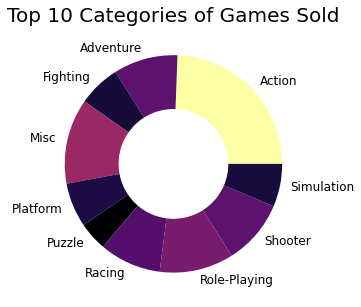

In [26]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.inferno(custom_colors(i)) for i in game]
plt.figure(figsize=(5,5))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

In [9]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177655,-0.400317,-0.379143,-0.269326,-0.332739,-0.426979
Year,0.177655,1.000000,-0.091233,0.006236,-0.169391,0.041248,-0.074565
NA_Sales,-0.400317,-0.091233,1.000000,0.768919,0.451278,0.634513,0.941268
EU_Sales,-0.379143,0.006236,0.768919,1.000000,0.436373,0.726253,0.903262
JP_Sales,-0.269326,-0.169391,0.451278,0.436373,1.000000,0.290553,0.612770
Other_Sales,-0.332739,0.041248,0.634513,0.726253,0.290553,1.000000,0.747960
Global_Sales,-0.426979,-0.074565,0.941268,0.903262,0.612770,0.747960,1.000000


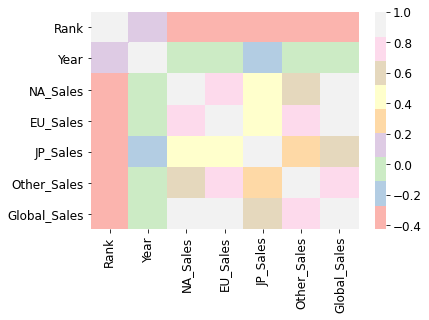

In [10]:
sns.heatmap(data.corr(), cmap="Pastel1")
plt.show()

In [11]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [14]:
# Training and Testing Accuracy
print("Training Accuracy :", model.score(xtrain, ytrain))
print("Testing Accuracy :", model.score(xtest, ytest))

Training Accuracy : 0.9999870440457412
Testing Accuracy : 0.9999929293537628


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, predictions))
# The coefficient of determination: 
print("Coefficient of determination: %.2f" % r2_score(ytest, predictions))

Coefficients: 
 [8.02400864e-08 1.00008732e+00 9.99930916e-01 9.99985443e-01
 1.00005120e+00]
Mean squared error: 0.00
Coefficient of determination: 1.00


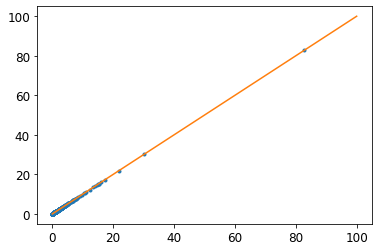

In [16]:
predictions = model.predict(xtest)
plt.plot(ytest, predictions,'.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 100,10)
y = x
plt.plot(x, y)
plt.show()

In [19]:
print("Predictions: ", model.predict(xtest))

Predictions:  [0.0705823  1.66975138 2.29967932 ... 1.48979017 0.06059278 1.32974684]


In [20]:
model.predict([[259,4,0.26,0.0,0.05]])

array([4.3099538])

In [21]:
Pridiction_values_df = pd.DataFrame({'Actual Value':ytest,'Predictied value':predictions, 'Difference':ytest-predictions })
Pridiction_values_df[0:10]

,Actual Value,Predictied value,Difference
7949,0.07,0.070582,-0.000582
2380,1.67,1.669751,0.000249
13607,2.30,2.299679,0.000321
2252,0.09,0.090480,-0.000480
7272,0.93,0.929851,0.000149
15724,0.06,0.060593,-0.000593
10793,0.06,0.060589,-0.000589
11344,0.76,0.769806,-0.009806
13300,0.06,0.060607,-0.000607
3921,0.30,0.310075,-0.010075
